連接雲端硬碟

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


設定開啟檔案路徑

In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/2025_tvdi_ML/tsmc2330.csv')


# 資料預先處理
1.資料清洗
- 前置處理工作
- 缺失值處理
- 重複值處理
- 異常值處理
2.資料檢查
- 資料範圍檢查
- 資料格式檢查

資料讀取預覽


In [ ]:
df.head(1313)

,Date,Open,High,Low,Close,Volume,Increase
0,2020/1/2,300.494387,306.368713,300.494387,306.368713,31754120,2.42%
1,2020/1/3,310.887459,311.791202,303.205647,306.820618,41811268,0.15%
2,2020/1/6,300.946345,302.301960,300.042602,300.042602,45343057,-2.21%
3,2020/1/7,300.494370,300.946241,295.071915,297.783142,50879181,-0.75%
4,2020/1/8,293.716301,300.946241,293.716301,297.783142,37567748,0.00%
...,...,...,...,...,...,...,...
1307,2025/5/27,971.000000,975.000000,961.000000,965.000000,26355315,-1.13%
1308,2025/5/28,984.000000,985.000000,967.000000,967.000000,26471533,0.21%
1309,2025/5/29,986.000000,986.000000,967.000000,967.000000,48602590,0.00%
1310,2025/6/2,958.000000,961.000000,946.000000,946.000000,33676511,-2.17%


取得資料集的資料摘要

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1312 non-null   object 
 1   Open      1312 non-null   float64
 2   High      1312 non-null   float64
 3   Low       1312 non-null   float64
 4   Close     1312 non-null   float64
 5   Volume    1312 non-null   int64  
 6   Increase  1312 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 71.9+ KB


取得資料集的敘述性統計數據: 數據分佈的集中趨勢、分散狀態和形狀，(不包含空值)。

In [ ]:
df.describe()

,Open,High,Low,Close,Volume
count,1312.000000,1312.000000,1312.000000,1312.000000,1.312000e+03
mean,593.866496,598.306654,588.984074,593.565137,3.655794e+07
std,219.055371,221.140018,217.224022,219.074379,2.095293e+07
min,229.954220,230.866737,214.897694,226.304153,0.000000e+00
25%,471.822735,474.327252,467.060705,470.205010,2.263582e+07
50%,547.761550,550.845745,543.604233,547.761627,3.201600e+07
75%,620.907562,624.292076,614.732116,619.785767,4.346142e+07
max,1144.664906,1154.618514,1129.734497,1129.734497,1.663077e+08


## 以AI生成Python程式碼：J.W.TUKEY

Outliers for Open:
45      239.491745
46      243.558639
47      229.954220
48      235.885516
49      234.516821
           ...    
1307    971.000000
1308    984.000000
1309    986.000000
1310    958.000000
1311    960.000000
Name: Open, Length: 247, dtype: float64
Lower bound: 248.195493825
Upper bound: 844.534803225
------------------------------
Outliers for High:
46      246.269866
47      230.866737
48      246.379456
49      239.535664
54      245.466981
           ...    
1307    975.000000
1308    985.000000
1309    986.000000
1310    961.000000
1311    965.000000
Name: High, Length: 245, dtype: float64
Lower bound: 249.38001666250005
Upper bound: 849.2393115625
------------------------------
Outliers for Low:
45      239.491745
46      234.973084
47      214.897694
48      233.604224
49      229.954237
           ...    
1307    961.000000
1308    967.000000
1309    967.000000
1310    946.000000
1311    950.000000
Name: Low, Length: 243, dtype: float64
Lower bound: 245.55358

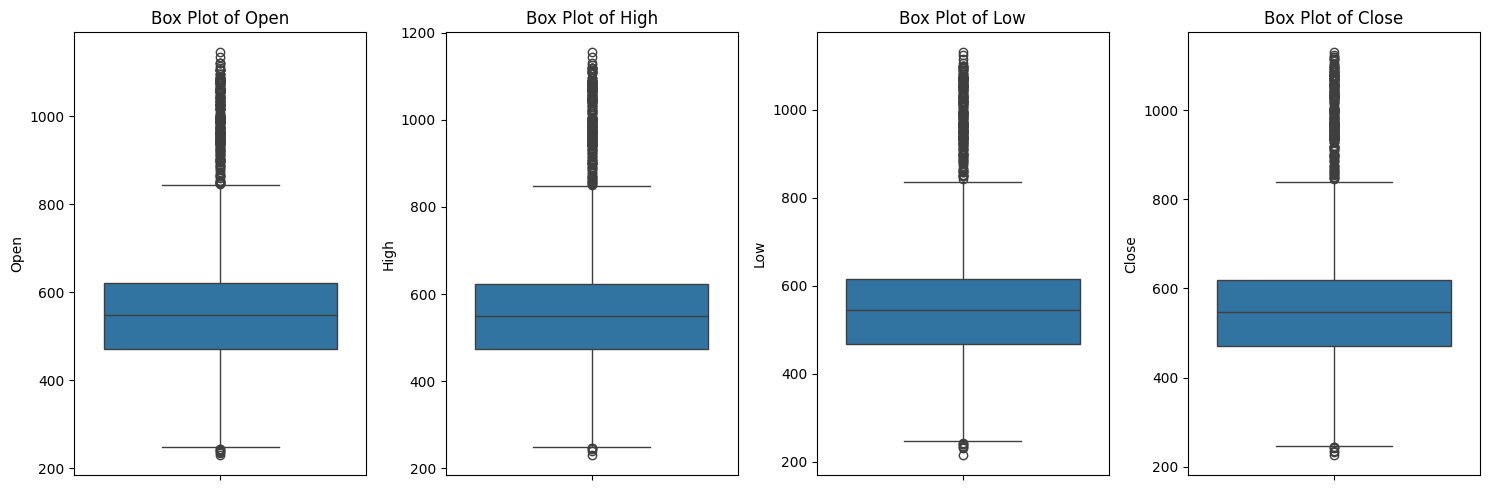

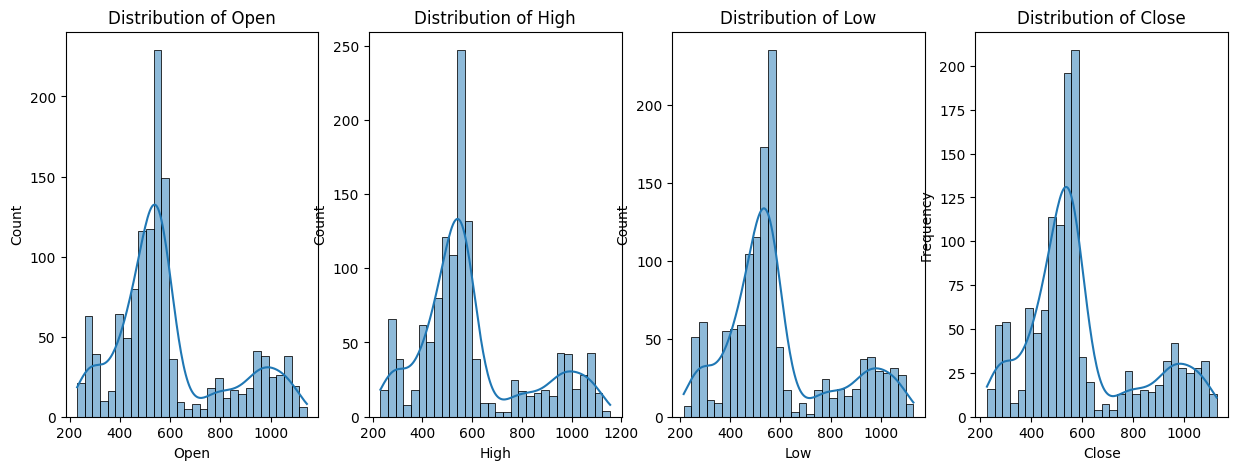

In [ ]:
# prompt: 請以J. W. TUKEY在1977年於Exploratory Data Analysis所發表的方式計算2330TW_5years_data.csv四個欄位：Open, High, Low, Close 的離群值，並繪製盒鬚圖與常態分配圖。

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to detect outliers using Tukey's fences
def detect_tukey_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers, lower_bound, upper_bound

# Columns to analyze
columns_to_analyze = ['Open', 'High', 'Low', 'Close']

# Detect and print outliers for each column
for col in columns_to_analyze:
    outliers, lower_bound, upper_bound = detect_tukey_outliers(df[col])
    print(f"Outliers for {col}:")
    print(outliers)
    print(f"Lower bound: {lower_bound}")
    print(f"Upper bound: {upper_bound}")
    print("-" * 30)

# Plotting Box Plots
plt.figure(figsize=(15, 5))
for i, col in enumerate(columns_to_analyze):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

# Plotting Distribution Plots (Normal Distribution comparison)
plt.figure(figsize=(15, 5))
for i, col in enumerate(columns_to_analyze):
    plt.subplot(1, 4, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.show()


繪製盒鬚圖

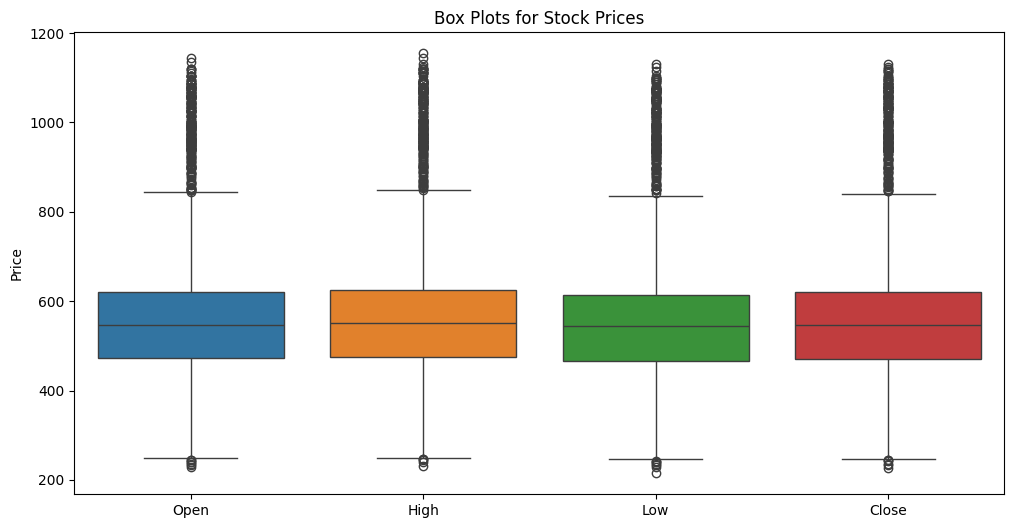

Outliers for Open:
           Date        Open
45    2020/3/17  239.491745
46    2020/3/18  243.558639
47    2020/3/19  229.954220
48    2020/3/20  235.885516
49    2020/3/23  234.516821
...         ...         ...
1307  2025/5/27  971.000000
1308  2025/5/28  984.000000
1309  2025/5/29  986.000000
1310   2025/6/2  958.000000
1311   2025/6/3  960.000000

[247 rows x 2 columns]

Outliers for High:
           Date        High
46    2020/3/18  246.269866
47    2020/3/19  230.866737
48    2020/3/20  246.379456
49    2020/3/23  239.535664
54    2020/3/30  245.466981
...         ...         ...
1307  2025/5/27  975.000000
1308  2025/5/28  985.000000
1309  2025/5/29  986.000000
1310   2025/6/2  961.000000
1311   2025/6/3  965.000000

[245 rows x 2 columns]

Outliers for Low:
           Date         Low
45    2020/3/17  239.491745
46    2020/3/18  234.973084
47    2020/3/19  214.897694
48    2020/3/20  233.604224
49    2020/3/23  229.954237
...         ...         ...
1307  2025/5/27  961.00000

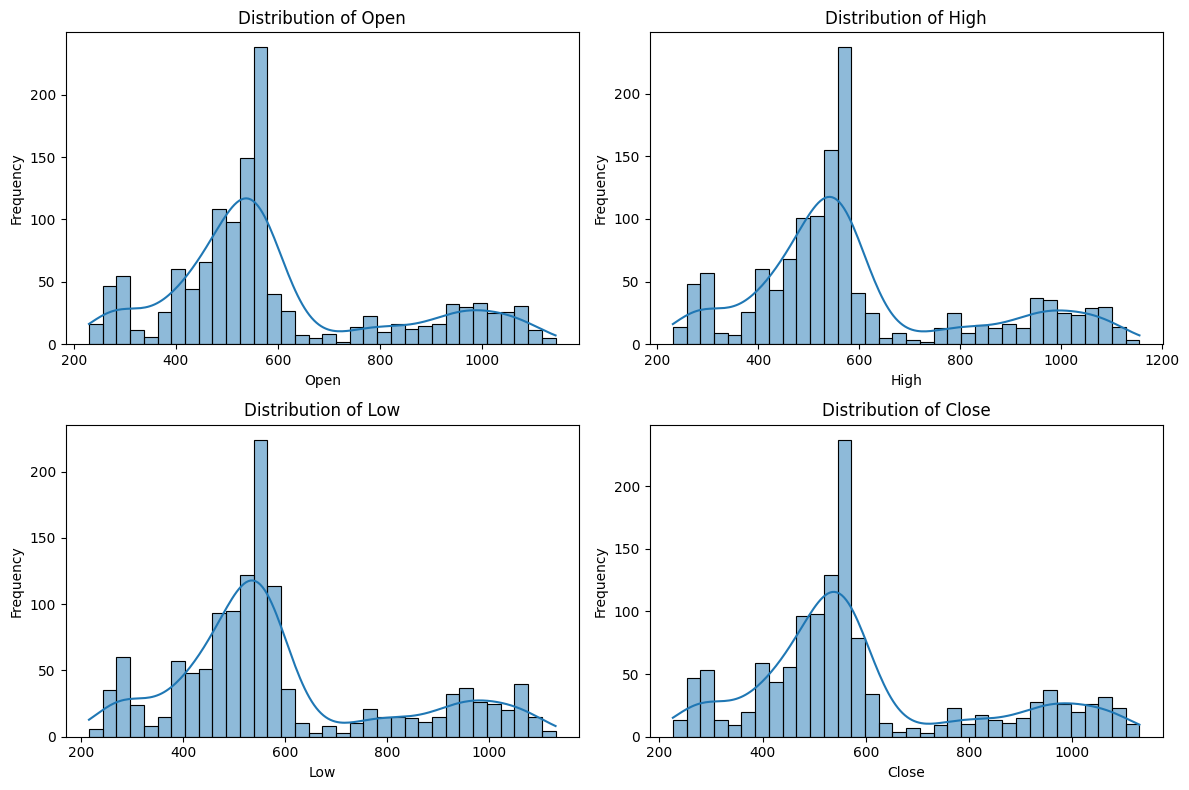

In [ ]:
# prompt: 在1977年於Exploratory data analysis 所發表的方式計算2330TW_5years_data.csv 欄位: Open, High, Low, Close 的離群值，並繪製盒鬚圖與常態分配圖

import matplotlib.pyplot as plt
import seaborn as sns

# 選擇需要分析的欄位
columns_to_analyze = ['Open', 'High', 'Low', 'Close']

# 繪製盒鬚圖
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[columns_to_analyze])
plt.title('Box Plots for Stock Prices')
plt.ylabel('Price')
plt.show()

# 計算離群值 (使用 IQR 方法)
for col in columns_to_analyze:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  print(f"Outliers for {col}:\n{outliers[['Date', col]]}\n")

# 繪製常態分配圖 (直方圖和 Kde 曲線)
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns_to_analyze):
  plt.subplot(2, 2, i + 1)
  sns.histplot(df[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

將離群值篩選出來寫入 ./content/drive/MyDrive/2025_tvdi_ML/deviation_test.csv 檔案

In [ ]:
# prompt: 將離群值篩選出來寫入 ./content/drive/MyDrive/2025_tvdi_ML/deviation_test.csv 檔案

# 將離群值篩選出來寫入 ./content/drive/MyDrive/2025_tvdi_ML/deviation_test.csv 檔案
outliers_list = []
for col in columns_to_analyze:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  outliers_list.append(outliers)

all_outliers = pd.concat(outliers_list).drop_duplicates()
all_outliers.to_csv('./content/drive/MyDrive/2025_tvdi_ML/deviation_test.csv', index=False)

print("Outliers have been written to ./content/drive/MyDrive/2025_tvdi_ML/deviation_test.csv")

                  Open        High         Low       Close    Volume Increase
Date                                                                         
2020-01-02  300.494387  306.368713  300.494387  306.368713  31754120    2.42%
2020-01-03  310.887459  311.791202  303.205647  306.820618  41811268    0.15%
2020-01-06  300.946345  302.301960  300.042602  300.042602  45343057   -2.21%
2020-01-07  300.494370  300.946241  295.071915  297.783142  50879181   -0.75%
2020-01-08  293.716301  300.946241  293.716301  297.783142  37567748    0.00%


<ipython-input-9-cc91b1b57664>:37: UserWarning: Glyph 32929 (\N{CJK UNIFIED IDEOGRAPH-80A1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-9-cc91b1b57664>:37: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-9-cc91b1b57664>:37: UserWarning: Glyph 33287 (\N{CJK UNIFIED IDEOGRAPH-8207}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-9-cc91b1b57664>:37: UserWarning: Glyph 31227 (\N{CJK UNIFIED IDEOGRAPH-79FB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-9-cc91b1b57664>:37: UserWarning: Glyph 21205 (\N{CJK UNIFIED IDEOGRAPH-52D5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-9-cc91b1b57664>:37: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-9-cc91b1b57664>:37: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s

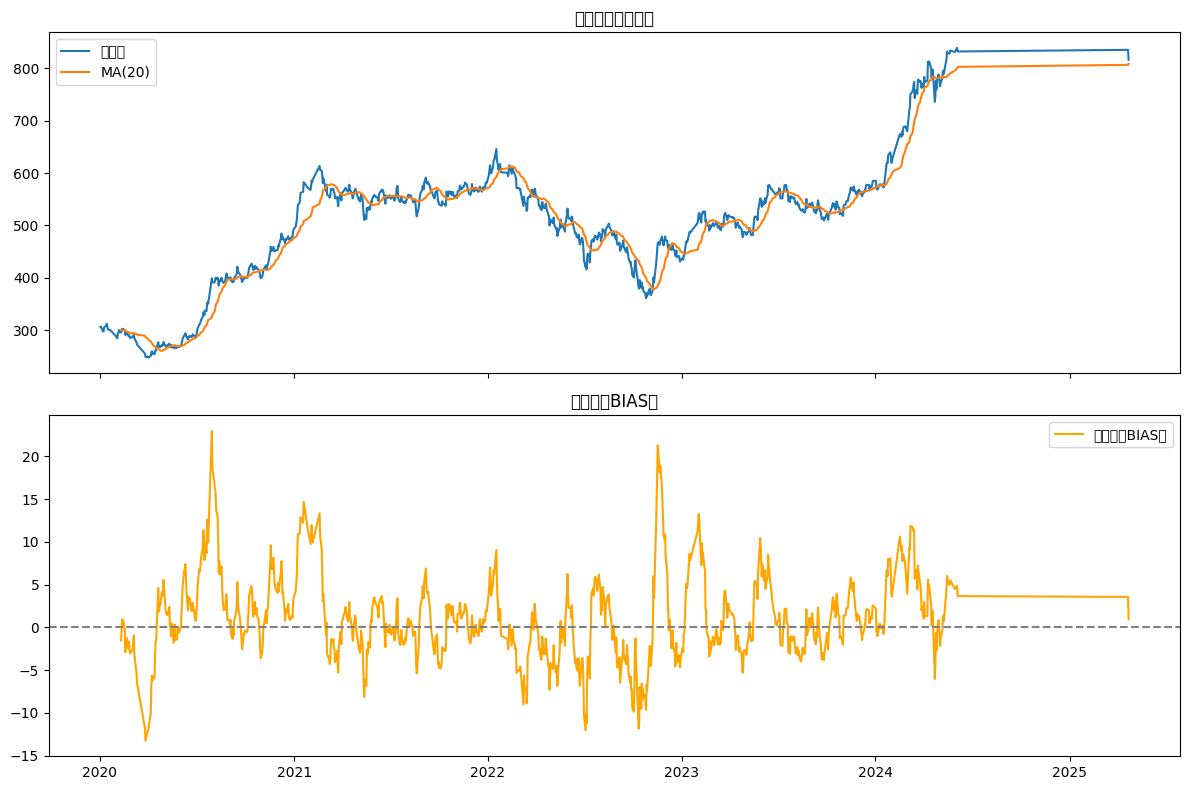

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 讀取自己的檔案（CSV 檔案為例）
file_path = '/content/drive/MyDrive/2025_tvdi_ML/2330TW_5years_data_cleaned.csv'  # <- 把這裡改成你實際檔案名稱
df = pd.read_csv(file_path)

# 假設你有一個 'Date' 欄位當作時間索引（可選）
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# 檢查一下資料（確認有 'Close' 欄位）
print(df.head())

# 設定移動平均期數
MA_period = 20
df['MA'] = df['Close'].rolling(window=MA_period).mean()

# 計算乖離率 BIAS
df['BIAS'] = ((df['Close'] - df['MA']) / df['MA']) * 100

# 繪圖（雙圖方式）
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# 第一張圖：股價與移動平均線
ax[0].plot(df.index, df['Close'], label='收盤價')
ax[0].plot(df.index, df['MA'], label=f'MA({MA_period})')
ax[0].legend()
ax[0].set_title('股價與移動平均線')

# 第二張圖：乖離率
ax[1].plot(df.index, df['BIAS'], color='orange', label='乖離率（BIAS）')
ax[1].axhline(0, color='gray', linestyle='--')
ax[1].legend()
ax[1].set_title('乖離率（BIAS）')

plt.tight_layout()
plt.show()

## 設定開啟檔案路徑

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/2025_tvdi_ML/tsmc2330.csv')

 ## 邏輯回歸演算法之應用:判斷台積電漲跌

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("/content/drive/MyDrive/2025_tvdi_ML/tsmc2330.csv")
df

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Return,Target,MA5,MA10,MA20,Price_Change,RSI,MACD,MACD_Signal,BB_Upper,BB_Lower
0,19,2020/2/7,298.235036,298.686908,294.620066,296.427551,28798327,-1.35,0,294.258600,295.071942,299.997342,-1.807485,43.065737,-1.508643,-1.431600,315.071159,284.923525
1,20,2020/2/10,290.553192,296.427518,290.101321,295.975647,30632424,-0.15,0,296.517938,294.439319,299.477689,5.422455,41.044731,-1.420512,-1.429362,314.341801,284.613577
2,21,2020/2/11,298.686925,300.494410,298.235054,299.590668,27524935,1.22,1,297.692786,294.303763,299.116191,0.903743,42.753644,-1.092871,-1.361563,313.574510,284.657872
3,22,2020/2/12,301.398109,303.657466,300.946238,302.753723,37612639,1.06,1,299.048401,294.484512,299.251747,1.355614,41.911724,-0.610923,-1.210544,313.797212,284.706282
4,23,2020/2/13,305.464950,305.464950,302.753723,302.753723,22757021,0.00,0,299.500262,296.156436,299.500276,-2.711227,45.967695,-0.229394,-1.013383,314.109803,284.890749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,1307,2025/5/27,971.000000,975.000000,961.000000,965.000000,26355315,-1.13,0,979.400000,984.900000,959.400000,-6.000000,61.349693,18.121109,17.890692,1021.704515,897.095485
1289,1308,2025/5/28,984.000000,985.000000,967.000000,967.000000,26471533,0.21,1,974.800000,981.700000,962.650000,-17.000000,65.806452,16.464413,17.605436,1018.827444,906.472556
1290,1309,2025/5/29,986.000000,986.000000,967.000000,967.000000,48602590,0.00,0,971.800000,979.100000,965.600000,-19.000000,57.258065,14.978804,17.080110,1015.544812,915.655188
1291,1310,2025/6/2,958.000000,961.000000,946.000000,946.000000,33676511,-2.17,0,964.200000,973.900000,965.400000,-12.000000,45.985401,11.968953,16.057879,1015.639008,915.160992


In [ ]:
# prompt: 使用 DataFrame df: 附檔是我的資料集，我想用邏輯回歸演算法預測台積電股價漲跌，再評估演算法的precison, recall, f1-score, support的數值。

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Define features (X) and target (y)
# Exclude 'Date', 'Unnamed: 0', 'Target', and 'Price_Movement' from features
X = df.drop(['Date', 'Unnamed: 0', 'Target', 'Price_Movement'], axis=1)
y = df['Target']

# Split data into training and testing sets
# Using 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model and print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83       139
           1       0.78      0.87      0.82       118

    accuracy                           0.83       257
   macro avg       0.83      0.83      0.83       257
weighted avg       0.83      0.83      0.83       257



In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("/content/drive/MyDrive/2025_tvdi_ML/tsmc2330-1.csv")
df

,Column1,Date,Open,High,Low,Close,Volume,Return,MA5,MA10,MA20,Price_Change,RSI,MACD,MACD_Signal,BB_Upper,BB_Lower,Target
0,19,2020/2/7,298.235036,298.686908,294.620066,296.427551,28798327,-1.35,294.258600,295.071942,299.997342,-1.807485,43.065737,-1.508643,-1.431600,315.071159,284.923525,0
1,20,2020/2/10,290.553192,296.427518,290.101321,295.975647,30632424,-0.15,296.517938,294.439319,299.477689,5.422455,41.044731,-1.420512,-1.429362,314.341801,284.613577,0
2,21,2020/2/11,298.686925,300.494410,298.235054,299.590668,27524935,1.22,297.692786,294.303763,299.116191,0.903743,42.753644,-1.092871,-1.361563,313.574510,284.657872,1
3,22,2020/2/12,301.398109,303.657466,300.946238,302.753723,37612639,1.06,299.048401,294.484512,299.251747,1.355614,41.911724,-0.610923,-1.210544,313.797212,284.706282,1
4,23,2020/2/13,305.464950,305.464950,302.753723,302.753723,22757021,0.00,299.500262,296.156436,299.500276,-2.711227,45.967695,-0.229394,-1.013383,314.109803,284.890749,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,1307,2025/5/27,971.000000,975.000000,961.000000,965.000000,26355315,-1.13,979.400000,984.900000,959.400000,-6.000000,61.349693,18.121109,17.890692,1021.704515,897.095485,0
1289,1308,2025/5/28,984.000000,985.000000,967.000000,967.000000,26471533,0.21,974.800000,981.700000,962.650000,-17.000000,65.806452,16.464413,17.605436,1018.827444,906.472556,1
1290,1309,2025/5/29,986.000000,986.000000,967.000000,967.000000,48602590,0.00,971.800000,979.100000,965.600000,-19.000000,57.258065,14.978804,17.080110,1015.544812,915.655188,0
1291,1310,2025/6/2,958.000000,961.000000,946.000000,946.000000,33676511,-2.17,964.200000,973.900000,965.400000,-12.000000,45.985401,11.968953,16.057879,1015.639008,915.160992,0


In [4]:
# prompt: 使用 DataFrame df: 附檔是我的資料集，我想用邏輯回歸演算法預測台積電股價漲跌，再評估演算法的precison, recall, f1-score, support的數值。

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Define features (X) and target (y)
# Exclude 'Date' and 'Column1' as they are not suitable for direct use in logistic regression
X = df.drop(['Date', 'Column1', 'Target'], axis=1)
y = df['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model using classification_report
report = classification_report(y_test, y_pred)

# Print the classification report
report

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


'              precision    recall  f1-score   support\n\n           0       0.77      0.84      0.81       188\n           1       0.84      0.77      0.80       200\n\n    accuracy                           0.80       388\n   macro avg       0.81      0.81      0.80       388\nweighted avg       0.81      0.80      0.80       388\n'

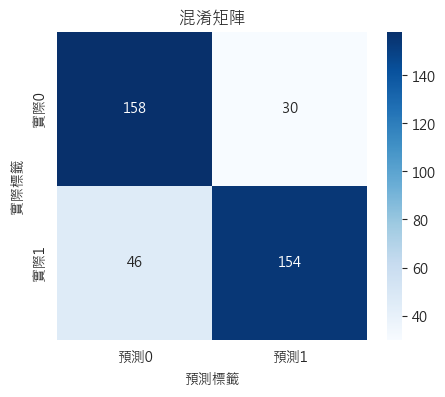

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. 先設定 matplotlib 的中文字型（以 Windows 微軟正黑體為例）
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 或 'SimHei'，視你系統字型而定
plt.rcParams['axes.unicode_minus'] = False  # 讓負號正常顯示

# 2. 在設定 seaborn 風格時，再指定字型（必須在 import seaborn 後執行）
sns.set_style("whitegrid", {"font.sans-serif": ['Microsoft JhengHei', 'Arial']})

# 3. 混淆矩陣數據
cm = np.array([[158, 30],
               [46, 154]])

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['預測0', '預測1'], yticklabels=['實際0', '實際1'])
plt.xlabel('預測標籤')
plt.ylabel('實際標籤')
plt.title('混淆矩陣')
plt.show()


<Figure size 800x400 with 0 Axes>

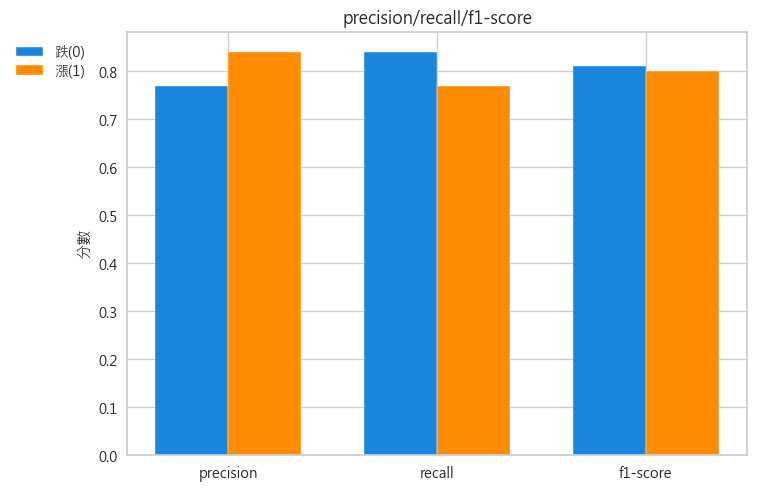

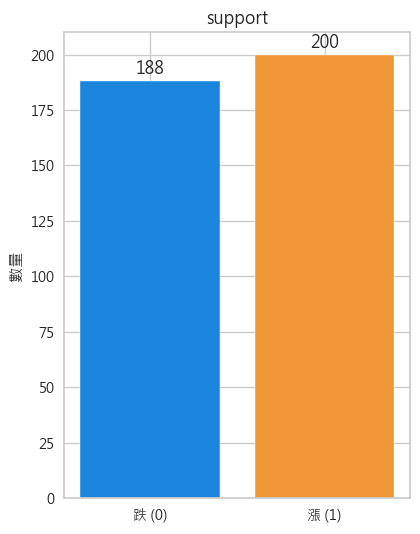

In [53]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['precision', 'recall', 'f1-score']
class0 = [0.77, 0.84, 0.81]
class1 = [0.84, 0.77, 0.80]
support = [188, 200]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(8,4))

# 第一張：分數指標
import matplotlib.pyplot as plt
import numpy as np

labels = ['precision', 'recall', 'f1-score']
class0 = [0.77, 0.84, 0.81]
class1 = [0.84, 0.77, 0.80]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, class0, width, label='跌(0)', color='#1985DD') 
bars2 = ax.bar(x + width/2, class1, width, label='漲(1)', color='#FF8C00')

# 調整圖例位置，往左移至第一個長條上方附近
ax.legend(loc='upper left', bbox_to_anchor=(-0.2, 1.0), labelspacing=0.2)

ax.set_ylabel('分數')
ax.set_title('precision/recall/f1-score')
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.show()


# 第二張：support
plt.subplot(1,2,2)
plt.bar(['跌 (0)', '漲 (1)'], support, color=['#1985DD', '#EE9536'])
plt.ylabel('數量')
plt.title('support')
for i, v in enumerate(support):
    plt.text(i, v+3, str(v), ha='center')

plt.tight_layout()
plt.show()
